# Отчет по финальному проекту "Прогнозирование оттока клиентов"

## 1. Введение
Выстраивание взаимоотношений с клиентами (или customer relationship managmenet, CRM) является важным звеном в функционировании любого бизнеса. От того, насколько хорошо простроена работа с аудиторией зачастую зависит успех всей компании. В проекте рассматривается одна из наиболее актуальных задач из области CRM: прогнозирование оттока пользователей (churn prediction). Суть задачи заключается в заблаговременном нахождении сегмента пользователей, склонных через некоторый промежуток времени отказаться от использования некоторого продукта или услуги. Точное и своевременное нахождение таких пользователей позволяет эффективно бороться с их оттоком, например, выявлять причины оттока и принимать меры по удержанию клиентов. Эта задача актуальна для большинства организаций, оказывающих услуги в сегменте B2C и вдвойне актуальна в областях, где распространение услуги близко к отметке 100%.

Цель проекта - научиться находить пользователей, склонных к оттоку. Если научиться находить таких пользователей с достаточной точностью заблаговременно, то можно эффективно управлять оттоком: например, выявлять причины оттока; помогать пользователям, попавшим в группу риска, решать их проблемы и задачи; проводить кампании по удержанию.

В соответствии с целью, были поставлены следующие задачи: 
1. провести разведочный анализ данных и подготовить признаки для построения модели,
2. построить прогнозую вероятностную модель и рассчитать метрики ее качества,
3. оценить экономический эффект от внедрения модели.

Вероятностная модель позволит заранее находить пользователей склонных к "оттоку", что даст возможность компании принимать меры по удержанию клиентов. Использование такого решения позволит компании сделать свой бизнес более эффективным и повысит прибыль.

Данные для работы были предоставлены французской телекоммуникационной компанией Orange. В задаче речь идет о клиентских данных, поэтому данные были предварительно анонимизированны: из датасета убрана любая персональная информация, позволяющая идентифицировать пользователей, а также не представлены названия и описания переменных, предназначенных для построения прогнозов. Он состоит из 40 тыс. объектов и включает 230 переменных, из которых первые 190 переменных - числовые, и оставшиеся 40 переменные - категориальные.

## 2. Методика измерения качества и критерий успеха.

Оптимизация и оценка качества модели будет проводится с помощью метрики ROC-AUC. ROC-кривая (англ. receiver operating characteristic) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

Также известна как кривая ошибок. Анализ классификаций с применением ROC-кривых называется ROC-анализом.

Количественную интерпретацию ROC даёт показатель AUC (англ. area under ROC curve, площадь под ROC-кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше. 

Кроме того, при оценке качества модели важно понять такие основные характеристики к точность(Precision) и полнота(Recall). Также полезно будем посмотреть на такие показатели, как F-Score и Log Loss. 	

Процесс тестирования будет устроен следующим образом. В начале будет выделена часть данных под hold out выборку(контроль на отложенных данных), которая необходима для финального теста работоспособности наиболее оптимальной модели. Если модель не сможет показать на отложенных данных результаты, которые бы были сопоставимы с результатами на тестах, то это будет сигналом о возможной переоптимизации и переподгонки под тестовые данные. Процесс тестирования различных моделей с различными настройкими будет проходить с использованием кросс-валидации(на 3 фолда). Это позволит наиболее полно использовать оставшиеся данные для тестов. Планируется пробовать различные комбинации обработки данных с различными вариантами оптимизационных моделей: регрессионная модель, случайный лес и градиентный бустинг.

Критерием успешности для модели будет выступать метрика ROC-AUC. Именно та модель, которая покажет максимальный результат по метрике ROC-AUC будет признана наиболее оптимальной для использования при работе с данной клиентской базой. Также можно считать, что компания ожидает получить от нас модель, чьи результаты по метрике ROC-AUC были бы выше 0.6671 (baseline в соревновании на kaggle). Также можно будет говорить об успехе только в том случае, если модель успешно пройдет тестирование на отложенных данных.

## Техническое описание решения. 

Опишите, как строится модель, какой pipeline обработки данных? Здесь отлично будут смотреться схематические иллюстрации!


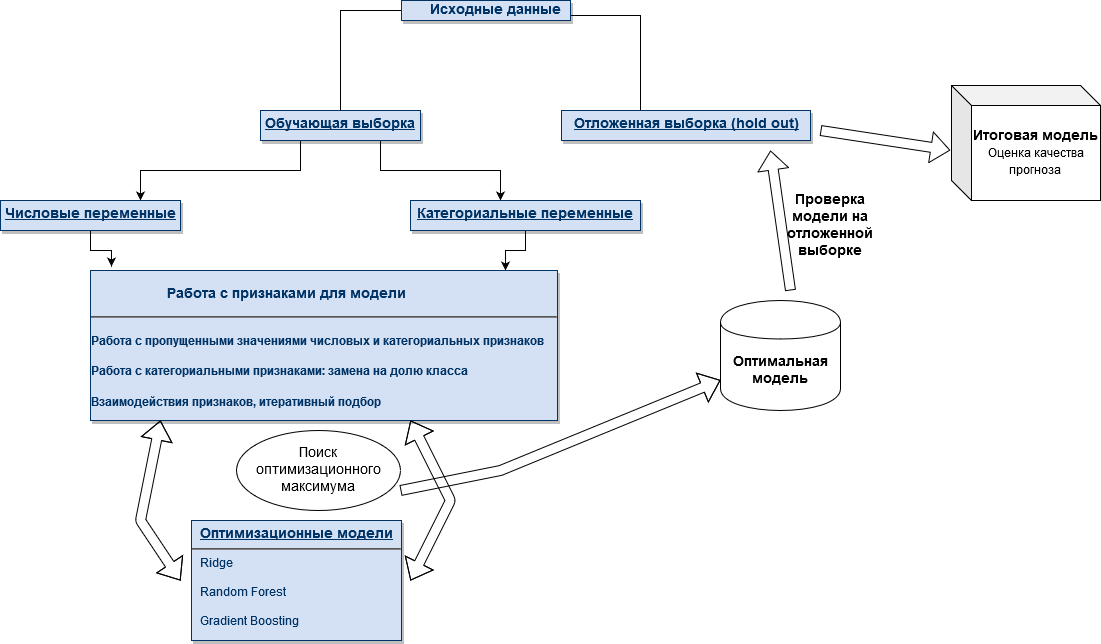

В начале, исходные данные делятся на обучающую выборку и отложенную выборку(hold out). Затем данные из обучающей выборки делятся по столбцам на те, которые содержат числовые переменные, и те, которые содержат категориальные переменные. Это делается потому, что методы работы с различными видами данных должны быть различными. В качестве вариантов оптимизационных моделей мы будем использовать следующие модели: регрессионная модель, случайный лес и градиентный бустинг. После определенных преобразований и операций с данными мы будем проверять, как на полученных данных смогли обучиться различные варианты моделей. Основной метрикой будет выступать ROC-AUC. Чтобы как можно полнее использовать обучающую выборку мы будем использовать кросс-валидацию на 3 фолда. В процессе поиска наилучшего решения были опробованы следующие методы преобразования данных и работы с ними:
- были построены кривые обучения для поиска оптимального размера выборки
- изменялось соотношение классов "отток" и "не отток" и узучалось как это влияет на качество моделей
- к выборке применялась технология undersampling
- применялись различныестратегии обработки пропусков в вещественных признаках
- были опробованы различные алгоритмы обработки категориальных признаков: заполнение пропусков самым частым значением, заполнение пропусков новым значением (NaV), преобразование признаков с помощью DictVectorizer, преобразование признаков с помощью OneHotEncoder, преобразование признаков с помощью LabelEncoder
- были проведены процедуры по  отбору признаков различными методами: add-del, метод SelectKBest из библиотеки sklearn.feature_selection, метод SelectFdr из библиотеки sklearn.feature_selection

Все эти преобразования проверялись сразу на 3 моделях (регрессионная, случайный лес и градиентный бустинг) и только после этого принималось решения стоит использовать такое преобразование или нет.

Кроме того, в самом конце для лучшего решения была проведена процедура подбора параметров модели с использованием GridSearchCV.

В итоге наилучшее качество было получено с использованием модели на основе GradientBoostingClassifier. При предварительном отборе признаков  были удалены все константные признаки и признаки не содержащие значений. Для более точного отбора призков использовался алгоритм SelectKBest, выбирающий 60 колонок. Вещественные признаки масштабируются с помощью StandardScaler. К категориальным признакам применяется LabelEncoder. Работа модели была проверена на holdout выборке, и эту проверку итоговая модель успешно прошла. Итоговое значение метрики ROC-AUC для модели на обучающей выборке равно 0.736806, на отложенной 0.736313. Видно, что на отложенной holdout выборке модель показывает практически в точности такой же результат по основной метрике ROC-AUC, как и на обучающей выборке. Это очень хорошо. Это говорит об устойчивости модели. Судя по всему, при настройке модели удалось избежать переоптимизации и переподгонки под данные. Я думаю, это говорит нам о хорошем качестве построенной модели.

В соревновании на kaggle в качестве метрики взята ROC AUC. Моя модель набрала 0.68122 по метрике ROC AUC, успешно преодолев baseline равный 0.66710.

Итоговые метрики модели приведены в таблице:

Поскольку для написания отчета я использую Jupyter notebook, то я хочу привести здесь рабочий код, который бы создавал бы и демонстрировал работу найденной оптимальной модели.

Загрузим библиотеки:

In [1]:
import pandas as pd
import random
import numpy as np
from scipy.sparse import coo_matrix, hstack
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import learning_curve
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
import scipy.stats as ss
import itertools
import sys



from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score, recall_score, precision_score, log_loss, make_scorer

from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

seed = 9202
first_categorial_index = 190

Объявим функции, необходимые для построения базовой модели

In [2]:
def fill_numericna(train_frame, test_frame, averageCalculator):
    """ Функция заполняет значения в числовом фрейме значениями, посчитанными averageCalculator. """
    
    # Посчитаем средние по колонкам
    numeric_avgs = averageCalculator(train_frame)
    
    # Оставим только те колонки, в которых среднее значение не равно NaN, т.к. в таких колонках совсем нет значений
    numeric_avgs = numeric_avgs.dropna()
    dropped_columns = train_frame.columns.drop(numeric_avgs.index)
    n_frame_train = train_frame[list(numeric_avgs.index)]
    n_frame_test = test_frame[list(numeric_avgs.index)]
    
    # Заполним пропущенные численные значения средними
    n_frame_train = n_frame_train.fillna(numeric_avgs, axis=0)
    n_frame_test = n_frame_test.fillna(numeric_avgs, axis=0)
    return (n_frame_train, n_frame_test, dropped_columns)

def fill_numericna_means(train_frame, test_frame):
    """ Функция заполняет значения в числовом фрейме средними и удаляет те колонки, в которых значений нет. """
    return fill_numericna(
        train_frame,
        test_frame,
        lambda f: f.mean(axis=0, skipna=True))

def fill_categorial_nav(train_frame, test_frame):
    return train_frame.fillna("NaV"), test_frame.fillna("NaV")

def remove_constant_features(frame, min_count=2):
    """Функция удаляет колонки, которые содержат только одно значение."""
    
    # Посчитаем количества уникальных значений по колонкам
    unique_counts = frame.nunique()
    # Удалим колонки с количеством значений меньшим min_count
    columns_to_drop = unique_counts[unique_counts < min_count].index
    
    return (frame.drop(columns=columns_to_drop), columns_to_drop)

class MatrixLabelEncoder:
    """ Класс кодирует категории числами от 0 до n, где n количество категорий в колонке. """
    
    def __init__(self):
        self.encoders = []
    
    def fit(self, matrix):
        for column_number in range(matrix.shape[1]):
            column = matrix[:,column_number]
            labelEncoder = LabelEncoder().fit(column)
            self.encoders.append(labelEncoder)
        return self
    
    def transform(self, matrix):
        transformed = np.empty(matrix.shape)
        for column_number in range(matrix.shape[1]):
            labelEncoder = self.encoders[column_number]
            num_column = labelEncoder.transform(matrix[:,column_number])
            for row_number, val in enumerate(num_column):
                transformed[row_number, column_number] = val
        return transformed
    
class CompositeEncoder:
    """ Класс принимает набор фабрик с методами fit и transform и последовательно применяет их """
    def __init__(self, encoder_factories):
        self.encoder_factories = encoder_factories
        
    def fit(self, matrix):
        encoders = []
        transformed = matrix
        for encoder_factory in self.encoder_factories:
            encoder = encoder_factory().fit(transformed)
            encoders.append(encoder)
            transformed = encoder.transform(transformed)
        self.encoders = encoders
        return self

    def transform(self, matrix):
        for encoder in self.encoders:
            matrix = encoder.transform(matrix)
        return matrix
    


def predict_model_proba(X, model):
    """ Функция возвращает вероятности предсказаний для класса churn """
    return list(zip(*model.predict_proba(X)))[1]
    
def stratifiedKFold_fscore(
    frame,
    labels,
    model_factory,
    process_frame,
    frame_to_matrix,
    numeric_features,
    categorial_features,
    predict_probabilities,
    seed,
    folds_count = 3):
    """ Функция разбивает набор данных на folds_count, считает ROC-AUC на каждом фолде
        и возвращает усредненное по фолдам значение.
        Функция также возвращает модель, показавшую лучшее качество, её метрики и разделение данных.
        Разделение данных нужно для того, чтобы строить метрики модели на данных, на которых она не обучалась."""
    skf = StratifiedKFold(n_splits=folds_count, shuffle=True, random_state=seed)
    
    best_model = None
    best_score = 0
    best_precision = 0
    best_recall = 0
    best_table = None
    best_split = None
    best_encoders = None
    best_dropped_columns = None
    metrics_sum = 0
    for train_indices, test_indices in skf.split(frame, labels):
        # Разобьем фрем на train и test с помощью функции process_frame
        # Внутри такой функции мы можем по-разному обрабатывать признаки обучаясь только на train наборе.
        train_frame, train_labels, test_frame, test_labels, dropped_numeric, dropped_categorial = process_frame(
            frame.loc[train_indices, :],
            labels.loc[train_indices, :],
            frame.loc[test_indices, :],
            labels.loc[test_indices, :],
            numeric_features,
            categorial_features)
        numeric_cleaned = numeric_features.drop(dropped_numeric)
        categorial_cleaned = categorial_features.drop(dropped_categorial)
        # Преобразуем фреймы в матрицы.
        # Тут можно выполнить финальное преобразование признаков, например масштабирование признаков.
        # В функции frame_to_matrix энкодеры типа StandardScaler обучаются только на train признаках.
        X_train, X_test, y_train, y_test, num_encoder, cat_encoder = frame_to_matrix(
            train_frame,
            test_frame,
            train_labels,
            test_labels,
            numeric_cleaned,
            categorial_cleaned)

        model = model_factory()
        # Обучим модель
        model.fit(X_train, y_train)
        
        # Построим вероятности принадлежности к целевому классу
        probabilities = predict_probabilities(X_test, model)
        # Считаем roc auc score
        rocAuc = roc_auc_score(y_test, probabilities)
        metrics_sum += rocAuc
        if(best_model is None or best_score < rocAuc):
            # В случае, если модель лучше предыдущих сохраним её
            # оценку, модель, матрицу ошибок и разделение данных
            best_score = rocAuc
            best_model = model
            best_dropped_columns = (dropped_numeric, dropped_categorial)
            best_encoders = (num_encoder, cat_encoder)
            best_split = (train_frame, train_labels, test_frame, test_labels)
    return (
        metrics_sum/folds_count,
        best_model,
        best_score,
        best_split,
        best_encoders,
        best_dropped_columns)

def cleanup_frame_common(frame, numeric_features, categorial_features):
    """Функция делит признакина числовые и категориальные и удаляет константные признаки, содержащие только одно значение"""
    # Разделим коллекции на группы - числовые и категориальные.
    numeric_frame = frame[numeric_features].copy()
    categorial_frame = frame[categorial_features].copy()
    # Удалим вещественные колонки, содержащие одно и менее значений. 0 значений мы получаем, когда значения во всех строках Nan.
    numeric_frame_no_const, dropped_const_numeric_columns = remove_constant_features(numeric_frame)
    
    # Удалим категориальные колонки, содержащие ноль значений. Если есть одно значение, то могут быть Nan, которые для
    # категориальных признаков могут быть еще одной категорией (зависит от стратегии обработки).
    categorial_frame_no_const, dropped_const_categorial_columns = remove_constant_features(categorial_frame, 1)
    
    # Восстановим фрейм и вернем вместе с ним список удаленных категориальных колонок.
    return (pd.concat([numeric_frame, categorial_frame], axis=1),
            list(dropped_const_numeric_columns),
            list(dropped_const_categorial_columns))

def process_frame(
    train_frame,
    train_labels,
    test_frame,
    test_labels,
    numeric_features,
    categorial_features,
    fill_na_numerics,
    fill_na_categorial):
    """ Функция обрабатывает числовые признаки, заполняя пропуски. """
    
    # Удалим константные колонки из train_frame, и такие-же колонки из test_frame
    train_frame, const_numeric_columns, const_categorial_columns = cleanup_frame_common(
        train_frame,
        numeric_features,
        categorial_features)
    test_frame = test_frame.drop(columns=const_numeric_columns)
    test_frame = test_frame.drop(columns=const_categorial_columns)
    
    numeric_features = numeric_features.drop(const_numeric_columns)
    categorial_features = categorial_features.drop(const_categorial_columns)
    
    # Заполним пропущенные вещественные значения
    numeric_train, numeric_test, dropped_numeric = fill_na_numerics(
        train_frame[numeric_features],
        test_frame[numeric_features])
    
    numeric_features = numeric_features.drop(dropped_numeric)
    
    # Заполним пропущенные категориальные значения строками "NaV" (Not a value)
    categorial_train, categorial_test = fill_na_categorial(train_frame[categorial_features], test_frame[categorial_features])
    
    # Удалим категориальные колонки с одним единственным значением
    categorial_train, dropped_categorial = remove_constant_features(categorial_train)
    categorial_test = categorial_test.drop(columns=dropped_categorial)
    
    categorial_features = categorial_features.drop(dropped_categorial)
    
    # Список удаленных колонок
    dropped_numeric = np.concatenate([
        list(const_numeric_columns),
        list(dropped_numeric)])
    dropped_categorial = np.concatenate([
        list(const_categorial_columns),
        list(dropped_categorial)])
    
    return (pd.concat([numeric_train, categorial_train], axis=1),
            train_labels,
            pd.concat([numeric_test, categorial_test], axis=1),
            test_labels,
            dropped_numeric,
            dropped_categorial)

def process_frame_base(
    train_frame,
    train_labels,
    test_frame,
    test_labels,
    numeric_features,
    categorial_features):
    return process_frame(
        train_frame,
        train_labels,
        test_frame,
        test_labels,
        numeric_features,
        categorial_features,
        fill_numericna_means,
        fill_categorial_nav)

def scale_features(train_frame, test_frame):
    train_numeric = train_frame.as_matrix()
    
    scaler = StandardScaler().fit(train_numeric)
    
    train_numeric = coo_matrix(scaler.transform(train_numeric))
    test_numeric = coo_matrix(scaler.transform(test_frame.as_matrix()))
    
    return (train_numeric, test_numeric, scaler)



def int_label_features(train_frame, test_frame):
    fit_matrix = pd.concat([train_frame, test_frame]).as_matrix()
    categorial_encoder = MatrixLabelEncoder().fit(fit_matrix)
    
    train_categorial = categorial_encoder.transform(train_frame.as_matrix())
    test_categorial = categorial_encoder.transform(test_frame.as_matrix())
    
    return (train_categorial, test_categorial, categorial_encoder)

def frame_to_matrix_one_hot(
    train_frame,
    test_frame,
    train_labels,
    test_labels,
    numeric_features,
    categorial_features):
    """ Функци преобразует фрейм к sparse матрице.
        Масштабирует вещественные признаки и кодирует категориальные с помощью OneHotEncoding. """
    # Масштабируем вещественные признаки
    train_numeric, test_numeric, scaler = scale_features(
        train_frame[numeric_features],
        test_frame[numeric_features])
    
    # Закодируем категориальные признаки значениями от 0 до n с помощью MatrixLabelEncoder
    # One hot encode для категориальных признаков
    train_categorial, test_categorial, categorial_encoder = one_hot_features(
        train_frame[categorial_features],
        test_frame[categorial_features])
    
    y_train = train_labels.as_matrix().flatten()
    y_test = test_labels.as_matrix().flatten()
    
    return (hstack([train_numeric, train_categorial]),
            hstack([test_numeric, test_categorial]),
            y_train,
            y_test,
            scaler,
            categorial_encoder)

def frame_to_matrix_labeled(
    train_frame,
    test_frame,
    train_labels,
    test_labels,
    numeric_features,
    categorial_features):
    """ Функция преобразует фрейм к sparse матрице.
        Масштабирует вещественные признаки и кодирует категориальные целыми числами. """
    
    # Масштабируем вещественные признаки
    train_numeric, test_numeric, scaler = scale_features(
        train_frame[numeric_features],
        test_frame[numeric_features])
    
    # Закодируем категориальные признаки значениями от 0 до n с помощью MatrixLabelEncoder
    train_categorial, test_categorial, categorial_encoder = int_label_features(
        train_frame[categorial_features],
        test_frame[categorial_features])
    
    y_train = train_labels.as_matrix().flatten()
    y_test = test_labels.as_matrix().flatten()
    
    return (hstack([train_numeric, train_categorial]),
            hstack([test_numeric, test_categorial]),
            y_train,
            y_test,
            scaler,
            categorial_encoder)



def gradient_boosting_baseline_builder(frame, labels, numeric_features, categorial_features):
    return stratifiedKFold_fscore(
        frame,
        labels,
        GradientBoostingClassifier,
        process_frame_base,
        frame_to_matrix_labeled,
        numeric_features,
        categorial_features,
        predict_model_proba,
        seed)

Загрузим dataset.

In [5]:
churn_data_frame = pd.read_csv("../data/orange_small_churn_data.train", ",")
churn_labels_frame = pd.read_csv("../data/orange_small_churn_labels.train", header=None)
print(churn_data_frame.shape)
print(churn_labels_frame.shape)

(40000, 230)
(40000, 1)


Разделим на классы "отток" и "не отток"

In [8]:
churn_indices = list(churn_labels_frame[churn_labels_frame[0] == 1].index)
not_churn_indices = list(churn_labels_frame[churn_labels_frame[0] == -1].index)

churn_frame = churn_data_frame.loc[churn_indices, :]
not_churn_frame = churn_data_frame.loc[not_churn_indices, :]

churn_labels = churn_labels_frame.loc[churn_indices, :]
not_churn_labels = churn_labels_frame.loc[not_churn_indices, :]

Теперь возьмем по 30% из выборки класса "отток" и 30% из выборки класса "не отток", чтобы сохранить соотношение классов в тренировочной и тестовой выборках

In [9]:
test_proportion = 0.3
(churn_train_data,
 churn_test_data,
 churn_train_labels,
 churn_test_labels) = train_test_split(
    churn_frame,
    churn_labels,
    test_size=test_proportion,
    random_state=seed)

(not_churn_train_data,
 not_churn_test_data,
 not_churn_train_labels,
 not_churn_test_labels) = train_test_split(
    not_churn_frame,
    not_churn_labels,
    test_size=test_proportion,
    random_state=seed)


Теперь объединим данные в два датасета train и test

In [10]:
def concatenate_classes(churn_data, not_churn_data, churn_labels, not_churn_labels):
    train_data = pd.concat([churn_data, not_churn_data], axis = 0, ignore_index=True)
    train_labels = pd.concat([churn_labels, not_churn_labels], axis = 0, ignore_index=True)
    train_data["labels"] = train_labels.as_matrix()
    return train_data

In [11]:
train_data = concatenate_classes(
    churn_train_data,
    not_churn_train_data,
    churn_train_labels,
    not_churn_train_labels)

test_data = concatenate_classes(
    churn_test_data,
    not_churn_test_data,
    churn_test_labels,
 

Перемешаем наборы данных, чтобы классы не были разделены заранее внутри датасетов

In [12]:
train_data = pd.DataFrame(shuffle(train_data.as_matrix(), random_state=seed), columns = train_data.columns)
test_data = pd.DataFrame(shuffle(test_data.as_matrix(), random_state=seed), columns = test_data.columns)

In [13]:
churn_labels_frame = pd.DataFrame(train_data["labels"])
churn_data_frame = train_data.drop("labels", axis=1)
churn_data_frame[["Var73"]] = churn_data_frame[["Var73"]].astype(np.float64)
churn_labels_frame[["labels"]] = churn_labels_frame[["labels"]].astype(np.int64)

test_labels_frame = pd.DataFrame(test_data["labels"])
test_data_frame = test_data.drop("labels", axis=1)
test_data_frame[["Var73"]] = test_data_frame[["Var73"]].astype(np.float64)
test_labels_frame[["labels"]] = test_labels_frame[["labels"]].astype(np.int64)


Рассчитаем доли классов отток и не отток.

In [14]:
def show_proportion_data(frame):
    proportion_plot = frame.plot(
        kind="hist",
        title="Labels proportion",
        figsize=(2,3),
        legend=False)
    proportion_plot.set_xlabel("Label value")
    proportion_plot.set_ylabel("Label frequency")
    not_churn_proportion = float(frame[frame["labels"] == -1].shape[0])/float(frame.shape[0])
    churn_proportion = float(frame[frame["labels"] == 1].shape[0])/float(frame.shape[0])
    print ("Доля ответов класса \"отток\": %.4f%%\nДоля ответов класса \"не отток\": %.4f%%\nКласса \"отток\" меньше в %.4f раз" % (churn_proportion, not_churn_proportion, not_churn_proportion/churn_proportion))
    plt.show()

Доля ответов класса "отток": 0.0744%
Доля ответов класса "не отток": 0.9256%
Класса "отток" меньше в 12.4417 раз


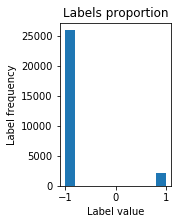

In [15]:
show_proportion_data(churn_labels_frame)

Сделаем балансировку этих двух классов

Доля ответов класса "отток": 0.4910%
Доля ответов класса "не отток": 0.5090%
Класса "отток" меньше в 1.0368 раз


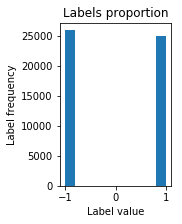

In [16]:
churn_only_labels = churn_labels_frame[churn_labels_frame["labels"] == 1]
churn_indices = list(churn_only_labels.index)
churn_only_frame = churn_data_frame.loc[churn_indices,:]
churn_balanced_frame = churn_data_frame.copy()
churn_balanced_labels = churn_labels_frame.copy()
for i in range(0, 11):
    churn_balanced_frame = pd.concat([churn_balanced_frame, churn_only_frame], ignore_index=True)
    churn_balanced_labels = pd.concat([churn_balanced_labels, churn_only_labels], ignore_index=True)
show_proportion_data(churn_balanced_labels)

 Рассчитаем корреляции числовых переменных с целевой функцией и проанализируем полученные данные.

In [17]:
def scale_frame(frame):
    """Функция масштабирает frame на отрезок [0;1]"""
    scaler = StandardScaler()
    scaled_matrix = scaler.fit_transform(frame.as_matrix())
    return pd.DataFrame(scaled_matrix, columns=frame.columns)

def split_frame(frame, n_columns, c_columns):
    """Функция разбивает фрейм на два числовой и категориальный, а также масштабирует значения и заполняет пропуски."""
    n_frame = frame[n_columns].copy()
    c_frame = frame[c_columns].copy()
    # Посчитаем средние по колонкам
    numeric_means = n_frame.mean(axis=0, skipna=True)
    # Оставим только те колонки, в которых среднее значение не равно NaN, т.к. в таких колонках совсем нет значений
    numeric_means = numeric_means.dropna()
    dropped_numeric_colums = n_frame.columns.drop(numeric_means.index)
    n_frame = n_frame[list(numeric_means.index)]
    # Заполним пропущенные численные значения средними
    n_frame = n_frame.fillna(numeric_means, axis=0)
    # Заполним пропущенные категориальные значения строками "NaV" (Not a value)
    c_frame = c_frame.fillna("NaV")
    # Посчитаем количества уникальных значений по колонкам
    cat_unique_counts = c_frame.nunique()
    num_unique_counts = n_frame.nunique()
    # Удалим колонки с одним уникальным значением
    cat_columns_to_drop = cat_unique_counts[cat_unique_counts == 1].index
    num_columns_to_drop = num_unique_counts[num_unique_counts == 1].index
    c_frame = c_frame.drop(columns=cat_columns_to_drop)
    n_frame = n_frame.drop(columns=num_columns_to_drop)
    
    dropped_columns = np.concatenate([
        dropped_numeric_colums,
        list(num_columns_to_drop),
        list(cat_columns_to_drop)])
    # В конце масштабируем числовой frame на отрезок [0;1]
    return (scale_frame(n_frame), c_frame, dropped_columns)

def calculate_interrelations(frame, labels, first_class, second_class):
    # Выделим индексы отток/не отток
    first_indices = list(labels[labels["labels"] == first_class].index)
    second_indices = list(labels[labels["labels"] == second_class].index)
    # Средние значения в матрице значений "отток" по колонкам
    first_class_means = frame.loc[first_indices,:].mean(axis=0)
    # Средние значения в матрице значений "не отток" по колонкам
    second_class_means = frame.loc[second_indices,:].mean(axis=0)
    # Меры взаимосвязи
    interrelations = (first_class_means-second_class_means).abs().sort_values(ascending=False)
    return (interrelations,first_indices,second_indices)

def build_pivot_table(frame, labels, column):
    """ Функция строит таблицу сопряженности по колонке фрейма и фрейму целевой переменной """
    combined_frame = pd.concat([frame[column], frame[column], labels], axis=1)
    combined_frame.columns = [column, "values", "labels"]
    frame_pivot = pd.pivot_table(
        combined_frame,
        values=["values"],
        index=[column],
        columns=["labels"],
        fill_value = 0,
        aggfunc="count")
    return frame_pivot.as_matrix()

def v_Cramer_correlation(pivot_table):
    """ Функция считает корреляцию Крамера по таблице сопряженности """
    chi_stat = stats.chi2_contingency(pivot_table)[0]
    k_min = np.min(pivot_table.shape)
    n = np.sum(pivot_table)
    return np.sqrt(chi_stat/(n*(k_min-1)))

def v_Cramer_correlations(frame, labels):
    """ Функция считает корреляции Крамера по всем колонкам фрейма """
    correlations = []
    for col in frame.columns:
        pivot = build_pivot_table(frame, labels, col)
        correlations.append((col, v_Cramer_correlation(pivot)))
    return sorted(correlations, key=lambda v: v[1], reverse=True)

Выделим отдельно числовые и категориальные колонки.

In [18]:
numeric_columns = churn_balanced_frame.columns[:190]
categorial_columns = churn_balanced_frame.columns[190:]

numeric_frame, categorial_frame, dropped_columns = split_frame(
    churn_data_frame,
    numeric_columns,
    categorial_columns)
numeric_balanced_frame, categorial_balanced_frame, dropped_bal_columns = split_frame(
    churn_balanced_frame,
    numeric_columns,
    categorial_columns)

# Меры взаимосвязи
balanced_interrelations, churn_balanced_indices, not_churn_balanced_indices = calculate_interrelations(
    numeric_balanced_frame,
    churn_balanced_labels,
    1,
    -1)
interrelations, churn_indices, not_churn_indices = calculate_interrelations(
    numeric_frame,
    churn_labels_frame,
    1,
    -1)


Посчитаем корреляции Крамера

In [19]:
Cramer_correlations = pd.DataFrame(
    v_Cramer_correlations(categorial_balanced_frame, churn_balanced_labels),
    columns=["Feature", "Correlation"])
Cramer_correlations.head(10)

,Feature,Correlation
0,Var217,0.752459
1,Var202,0.658011
2,Var200,0.644428
3,Var214,0.644428
4,Var199,0.508464
5,Var198,0.500247
6,Var220,0.500247
7,Var222,0.500247
8,Var216,0.373775
9,Var192,0.235718


In [20]:
Cramer_correlations = Cramer_correlations.dropna()
categorial_features = Cramer_correlations["Feature"].as_matrix()
categorial_balanced_frame = categorial_balanced_frame[categorial_features]
categorial_frame = categorial_frame[categorial_features]

Выделим топ 10 числовых признаков наиболее сильно коррелирующих с целевой переменной для сбалансированной и несбалансированной выборки.

In [21]:
top_balanced_columns = balanced_interrelations.head(10).index
top_columns = interrelations.head(10).index
# Выделим топ 10 числовых признаков наименее сильно коррелирующих с целевой переменной
# для сбалансированной и несбалансированной выборки.
bottom_balanced_columns = balanced_interrelations.tail(10).index
bottom_columns = interrelations.tail(10).index
class_descriptions = [(0, not_churn_balanced_indices, "not churn", "blue"), (1, churn_balanced_indices, "churn", "red")]

Построим гистограммы распределений выбранных колонок датасета по классам.

In [24]:
def build_distribution_plots(frame, features, class_descriptions):
    """ Функция строит гистограммы распределений выбранных колонок датасета по классам """
    fig, axes = plt.subplots(
        nrows=int(len(features)/2 ),
        ncols=2,
        figsize=(10, 25))
    for feature_idx, col in enumerate(features):
        data = []
        colors = []
        labels = []
        for cl_idx, indices, data_class, color in class_descriptions:
            data.append(frame.loc[indices,col].as_matrix().flatten())
            colors.append(color)
            labels.append(data_class)
        ax = axes[int(feature_idx/2)][feature_idx%2]
        ax.hist(
            data,
            histtype='bar',
            color=colors,
            label=labels)
        ax.legend()
        ax.set_title(col)
    plt.show()

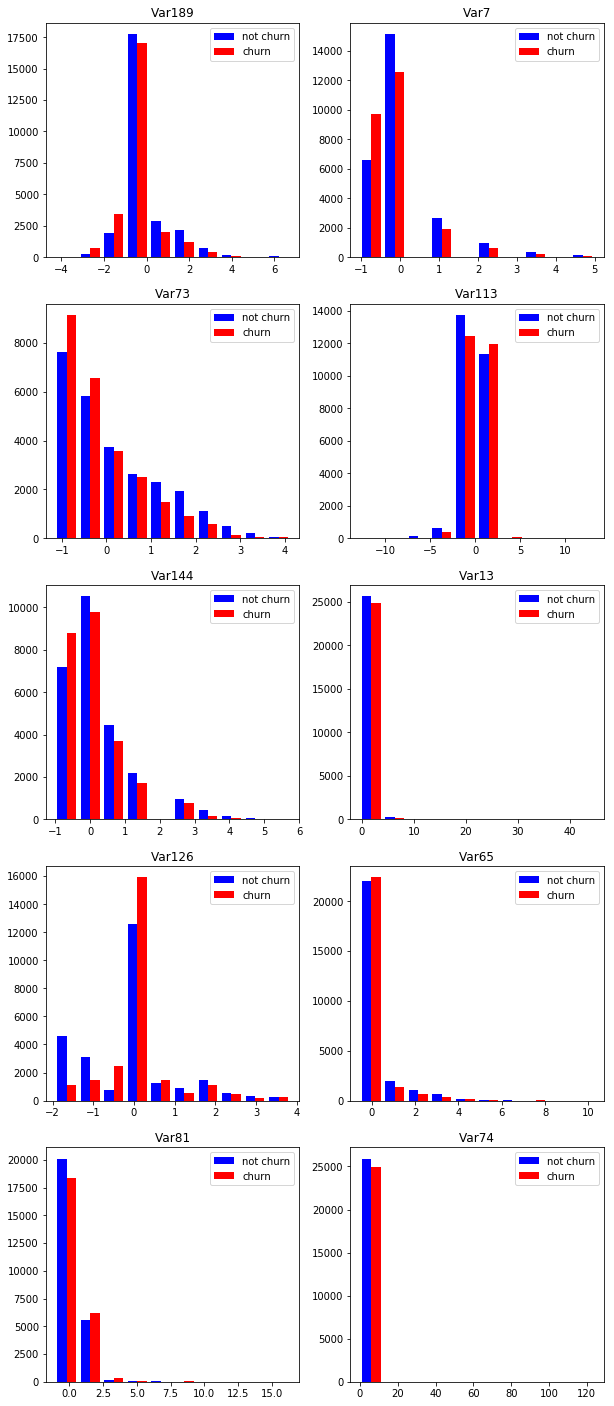

In [25]:
build_distribution_plots(numeric_balanced_frame, top_columns, class_descriptions)

Категориальные переменные оказываются очень разные, они имеют от 1 (только пропущенное) до >13 тысяч уникальных значений. Чтобы проверить, какие из переменных могут оказаться для нас полезными поступим как с пропущенными значениями числовых признаков. Рассчитаем для каждого уникального значения категориальной переменной долю положительного класса и построим доверительный интервал для этой доли. Если доля исходного датасета остутствует в интервале, то этот признак (с этими уникальными значениями) может оказаться полезным для модели.

На примере переменной Var229 рассчитаем доли:

In [26]:
train = pd.concat([churn_data_frame, churn_labels_frame], axis = 1, ignore_index=False)

train.loc[train['labels'] == -1, 'labels'] = 0
labels = train['labels'].copy()

# имена категориальных и числовых переменных
features_num = train.columns[0:190].tolist()
features_cat = train.columns[190:230].tolist()

# приводим типы
train[features_cat] = train[features_cat].astype(object)

# среднее по выборке
baseline = labels.mean()

In [27]:

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


# обертка для функции выше
def get_cramers_cor(var1, var2):
    if var1.equals(var2):
        return 1.0
    confusion_matrix = pd.crosstab(var1, var2)
    return cramers_corrected_stat(np.array(confusion_matrix))

# строим доверительный интервал Вильсона (т.к. смещенные доли) и проверяем, принадлежит ли ему бейслайн
def in_conf_int(baseline, proportion, n, alpha = 0.05):
    conf_int = proportion_confint(proportion*n, n, alpha = alpha, method="wilson")
    # print baseline, conf_int
    if baseline > conf_int[0] and baseline < conf_int[1]:
        return True
    return False

In [28]:
 #создадим временную таблицу
data = train.copy()
data['label'] = labels

# дадим шанс пропущенным значениям
data[features_cat] = data[features_cat].fillna('fakenan')

feat = 'Var229'
values = list(data[feat].unique())
props = list()
#print "feature: " + feat
for val in values:
    sub_label = data.loc[data[feat] == val, 'label'] # целевая переменная только у выбранного значения
    conf_int = proportion_confint(np.mean(sub_label)*len(sub_label), len(sub_label), method="wilson")
    print "value: {0:12}".format(val) + "\tn: {0:6}".format(len(sub_label)) +\
        "\tprop: {0:.4f}".format(np.mean(sub_label)) +\
        "\t CI: [{0:.4f}, {1:.4f}]".format(conf_int[0], conf_int[1]) +\
        "\tbaseline in CI: {0}".format(in_conf_int(baseline, np.mean(sub_label), len(sub_label)))

value: fakenan     	n:  15926	prop: 0.0881	 CI: [0.0838, 0.0926]	baseline in CI: False
value: am7c        	n:   6508	prop: 0.0572	 CI: [0.0518, 0.0631]	baseline in CI: False
value: mj86        	n:   5522	prop: 0.0554	 CI: [0.0497, 0.0618]	baseline in CI: False
value: sk2h        	n:     20	prop: 0.0500	 CI: [0.0089, 0.2361]	baseline in CI: True
value: oJmt        	n:     23	prop: 0.0435	 CI: [0.0077, 0.2099]	baseline in CI: True




Мы можем упростить себе поиск хороших категориальных признаков, если уменьшим их количество.

Так встречаются признаки, у которых все значения пропущены.

А также мы можем уменьшить пространство поиска, если посчитаем взаимные корреляции среди категориальных переменных. Отобразим в виде тепловой карты корреляций (использовалась лишь часть переменных):


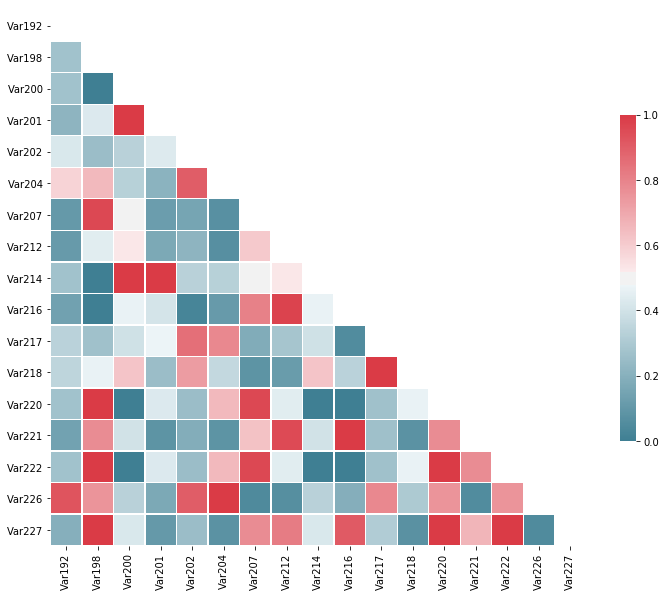

In [29]:
# рассматривать будет только эти категориальные переменные
features_cat_cor = ['Var192', 'Var198', 'Var200', 'Var201', 'Var202', 'Var204', 'Var207', 'Var212', 'Var214', 
                    'Var216', 'Var217', 'Var218', 'Var220', 'Var221', 'Var222', 'Var226', 'Var227']

# считаем корреляции
conf_matrix_cor = pd.DataFrame(1.0, index=features_cat_cor, columns=features_cat_cor)
for feat in itertools.combinations(features_cat_cor, 2):
    conf_matrix_cor.loc[feat[0], feat[1]] = get_cramers_cor(data[feat[0]], data[feat[1]])
    conf_matrix_cor.loc[feat[1], feat[0]] = conf_matrix_cor.loc[feat[0], feat[1]]

# маска треугольника
mask = np.zeros_like(conf_matrix_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# параметры графика
f, ax = plt.subplots(figsize=(12, 12))

# палитра
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# отрисовка тепловой карты
sns.heatmap(conf_matrix_cor, mask=mask, cmap=cmap, vmax=1.0, vmin=0.0,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.1, cbar_kws={"shrink": .5}, ax=ax)
plt.show()


Таким образом, показано как могут быть выявлены кандидаты в признаки для модели среди категориальных переменных.

# Качество модели

Построим кривые обучения, обучая модель на выборках разного размера начиная с небольшого количество объектов в обучающей выборке и постепенно наращивая её размер с некоторым шагом. Для этого воспользуемся sklearn.model_selection.learning_curve

In [68]:
train =  churn_data_frame
labels = churn_labels_frame

In [69]:
def dropUninformativeFeatures(data):
    """Drop features with one unique value"""
    cols_to_drop = []
    
    for col in data.columns:
        if len(data[col].unique()) == 1:
            cols_to_drop.append(col)
   
    if len(cols_to_drop) > 0:
        data.drop(columns=cols_to_drop, inplace=True)
        
def LabelEnc(data, cat_features):
    data1 = data.copy()
    data1 = data1.fillna(0)
    enc = LabelEncoder()
    for feat in cat_features:
        data1.loc[:, feat] = enc.fit_transform(data.loc[:, feat].astype(str))
    return data1

#кросс-валидация
def KFold(estimator, data, target, weights, n_folds = 5):
    scf = StratifiedKFold(n_splits = n_folds)
    y_scores = pd.DataFrame()
    y_tests = pd.DataFrame()
    fold = 1
    for train_index, test_index in scf.split(data, target):
        estimator.fit(data.iloc[train_index, :], target.iloc[train_index], sample_weight = weights)
        y_scores['Fold_' + str(fold)] = pd.Series(estimator.predict_proba(data.iloc[test_index, :])[:,1])
        y_tests['Fold_' + str(fold)] = pd.Series(target.iloc[test_index].values.flatten())
        fold = fold + 1
    return y_scores, y_tests

def ROCCurve(y_true, y_probas):
    plt.figure(figsize=(10,10))
    linewidth = 2
    n = 1
    mean_roc = []
    # для каждого фолда
    for i,j in zip(y_true, y_probas):
        fpr, tpr, thresholds = roc_curve(y_true[i].dropna(),y_probas[j].dropna())
        roc = round(auc(fpr,tpr),2)
        mean_roc.append(roc)
        plt.plot(fpr, tpr, color='g', label= 'ROC Fold ' + str(n)+ ' Area = {roc}', lw=linewidth)
        n += 1
    plt.plot([0, 1], [0, 1], color='b', lw=linewidth, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.1])
    plt.ylim([0.0, 1.1])
    plt.legend(loc="lower right")
    mean_roc = np.array(mean_roc)
    plt.title('ROC curve: Mean ROC={round(mean_roc.mean(), 2)}')
    plt.show()
    

In [70]:
# заполнение пропусков нулями
train = train.fillna(0)

# отбросим неинфомативные признаки
dropUninformativeFeatures(train)

# определение категориальных, численных признаков


def getNumCatFeats(data):
    import re
    num_f = [idx for idx, col in enumerate(data.columns) if int(re.search('\d+', col).group()) <= 190]
    cat_f = [idx for idx, col in enumerate(data.columns) if int(re.search('\d+', col).group()) > 190]
    names_num_f = [col for col in data.columns if int(re.search('\d+', col).group()) <= 190]
    names_cat_f = [col for col in data.columns if int(re.search('\d+', col).group()) > 190]
    return num_f, cat_f, names_num_f, names_cat_f

num_f, cat_f, names_numf, names_cat_f = getNumCatFeats(train)

#кодирование категориальных признаков
enc_data = LabelEnc(train, names_cat_f)

In [71]:
estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [72]:
train_sizes_abs, train_scores, test_scores = learning_curve(estimator, enc_data, labels, groups=None, 
                                                             train_sizes=np.linspace(0.1, 1, 10), 
                                                             cv=5, scoring='roc_auc', random_state=100)

In [73]:
#Отображение кривых обучения
def plot_learning_curve(title, train_sizes, train_scores, test_scores):
    plt.figure(figsize=(20,10))
    plt.title(title)
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

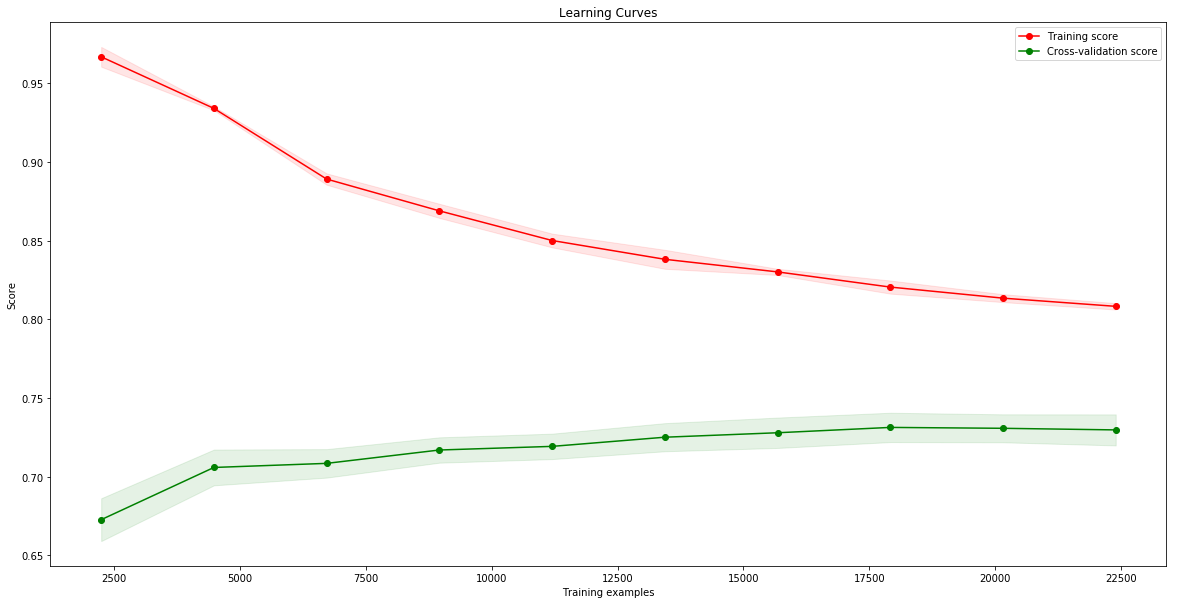

In [74]:
title = "Learning Curves"
plot_learning_curve(title, train_sizes_abs, train_scores, test_scores)
plt.show()

Хорошо видно, что чем больше данных, тем лучше показатели на кросс-валидации. Какой-то явной бесполезности в максимальном количестве данных не видно, хотя если данных будет в два раза меньше - это тоже не станет катастрофой. На мой взгляд рассчеты занимают не так много машинного времени, чтобы выкидывать из-за этого часть данных.

Было перепробывано много различных вариантов моделей.
Для отбора признаков воспользуемся методом SelectKBest из библиотеки sklearn.feature_selection. Оптимальным количеством параметров для алгоритма k-best является 60.

In [75]:
from sklearn.feature_selection import SelectKBest

numeric_columns = churn_data_frame.columns[:first_categorial_index]
categorial_columns = churn_data_frame.columns[first_categorial_index:]

In [76]:
def frame_to_matrix_kbest(
    train_frame,
    test_frame,
    train_labels,
    test_labels,
    numeric_features,
    categorial_features,
    k):
    train_matrix, test_matrix, train_labels_mtx, test_labels_mtx, sc, enc = frame_to_matrix_labeled(
        train_frame,
        test_frame,
        train_labels,
        test_labels,
        numeric_features,
        categorial_features)
    selector = SelectKBest(k=k).fit(train_matrix, train_labels_mtx)
    train_matrix = selector.transform(train_matrix)
    test_matrix = selector.transform(test_matrix)
    
    return (train_matrix,
            test_matrix,
            train_labels_mtx,
            test_labels_mtx,
            sc,
            enc)

def gradient_boosting_kbest_builder(frame, labels, numeric_features, categorial_features, k):
    return stratifiedKFold_fscore(
        frame,
        labels,
        GradientBoostingClassifier,
        process_frame_base,
        lambda tf, tsf, tl, tsl, nf, cf: frame_to_matrix_kbest(tf, tsf, tl, tsl, nf, cf, k),
        numeric_features,
        categorial_features,
        predict_model_proba,
        seed)

In [77]:
gb_kbest = gradient_boosting_kbest_builder(
    churn_data_frame,
    churn_labels_frame,
    numeric_columns,
    categorial_columns,
    60)

В итоге модель с использованием  SelectKBest из библиотеки sklearn.feature_selection показывает результат:

In [78]:
gb_kbest[0]

0.7312229505021209

Параметры модели выглядят следующим образом:

In [79]:
gb_kbest[1]

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [80]:
preprocessed_frame, preprocessed_labels, pf, pl, dropped_num_cols, dropped_cat_cols = process_frame_base(
    churn_data_frame,
    churn_labels_frame,
    churn_data_frame,
    churn_labels_frame,
    numeric_columns,
    categorial_columns)

clear_num_columns = numeric_columns.drop(dropped_num_cols)
clear_cat_columns = categorial_columns.drop(dropped_cat_cols)

preprocessed_x, px, preprocessed_y, py, ne, ce = frame_to_matrix_kbest(
    preprocessed_frame,
    pf,
    preprocessed_labels,
    pl,
    clear_num_columns,
    clear_cat_columns,
    60)


In [81]:
labeled_x, px, l_y, py, ne, ce = frame_to_matrix_labeled(
    preprocessed_frame,
    pf,
    preprocessed_labels,
    pl,
    clear_num_columns,
    clear_cat_columns)

mdl = SelectKBest(k=labeled_x.shape[1]).fit(labeled_x, preprocessed_y)


In [84]:
k_best_60_features = [f[0] for f in sorted(zip(preprocessed_frame.columns, mdl.scores_), key=lambda f: -f[1])][:60]
k_best_60_num = pd.Index(list(set(numeric_columns) & set(k_best_60_features)))
k_best_60_cat = pd.Index(list(set(categorial_columns) & set(k_best_60_features)))

Модель отобрала 60 лучших признаков. Лучшие числовые признаки это:

In [85]:
print("Best numeric:", ", ".join(k_best_60_num))

('Best numeric:', 'Var114, Var111, Var65, Var113, Var153, Var134, Var119, Var81, Var74, Var28, Var24, Var25, Var72, Var7, Var6, Var160, Var188, Var189, Var168, Var76, Var149, Var73, Var125, Var126, Var94, Var140, Var144, Var13, Var38, Var143, Var85, Var173, Var177')


Лучшие категориальные признаки:

In [92]:
print("Best categorial:", ", ".join(k_best_60_cat))

('Best categorial:', 'Var227, Var225, Var224, Var220, Var229, Var228, Var208, Var205, Var207, Var201, Var200, Var203, Var195, Var214, Var196, Var212, Var199, Var210, Var218, Var216, Var194, Var197, Var215, Var191, Var213, Var193, Var211')


Сделаем отбор данных с использованием наилучших признаков как для обучающей выборки, так и для отложенной выборки:

In [93]:
best_train_frame, best_train_labels, holdout_test_frame, holdout_test_labels, dropped_train_num, dropped_train_cat = process_frame_base(
    churn_data_frame[k_best_60_features],
    churn_labels_frame,
    test_data_frame[k_best_60_features],
    test_labels_frame,
    k_best_60_num,
    k_best_60_cat)

train_num_cols = k_best_60_num.drop(dropped_train_num)
train_cat_cols = k_best_60_cat.drop(dropped_train_cat)

preprocessed_x_train, preprocessed_x_test, preprocessed_y_train, preprocessed_y_test, ne, ce = frame_to_matrix_labeled(
    best_train_frame,
    holdout_test_frame,
    best_train_labels,
    holdout_test_labels,
    train_num_cols,
    train_cat_cols)

#preprocessed_x_test.shape, preprocessed_y_test.shape

In [94]:
def get_model_data(model_with_data, num_cols, cat_cols):
    """ Функция принимает на вход результат stratifiedKFold_fscore и возвращает только модель и её X_test и y_test """
    model = model_with_data[1]
    split = model_with_data[3]
    X_t_f = split[0]
    y_t_f = split[1]
    X_frame = split[2]
    y_frame = split[3]
    X_train, X, y_train, y, num_encoder, cat_encoder = frame_to_matrix_labeled(
            X_t_f,
            X_frame,
            y_t_f,
            y_frame,
            num_cols,
            cat_cols)
    return (model,X,y)

def calculate_metrics(model_with_data, num_cols, cat_cols, predict_probabilities, build_predictions):
    """ Посчитаем метрики качества для модели """
    model, X, y = get_model_data(model_with_data, num_cols, cat_cols)
    probabilities = predict_probabilities(X, model)
    predictions = build_predictions(X, model)
    # Считаем F-меру, precision и recall
    fscore = f1_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    # Считаем Log loss
    logLoss = log_loss(y, probabilities)
    # Считаем roc auc score
    rocAuc = roc_auc_score(y, probabilities)
    return (precision,recall,fscore,logLoss,rocAuc)

Построим оптимальную модель на уснове отобранных признаков

In [95]:
bestmodel = GradientBoostingClassifier().fit(preprocessed_x_train, preprocessed_y_train)
train_model = gradient_boosting_baseline_builder(
    churn_data_frame[k_best_60_features],
    churn_labels_frame,
    k_best_60_num,
    k_best_60_cat)
final_test_probabilities = predict_model_proba(preprocessed_x_test, bestmodel)
finalTrainRocAuc = train_model[0]
finalTestRocAuc = roc_auc_score(preprocessed_y_test, final_test_probabilities)


Сделаем рассчеты для оценки качества и построения графиков итоговой модели на обучающей выборке и на отложенной выборке(hold out):

In [99]:
test_model_with_data = (finalTestRocAuc, bestmodel, 0, (best_train_frame, best_train_labels, holdout_test_frame, holdout_test_labels))
score_table = pd.DataFrame(
    [
        calculate_metrics(train_model, train_num_cols, train_cat_cols, predict_model_proba, lambda x, m: m.predict(x)),
        calculate_metrics(test_model_with_data, train_num_cols, train_cat_cols, predict_model_proba, lambda x, m: m.predict(x))
         
    ],
    index=["Train quality", "Test quality"],
    columns=["Precision", "Recall", "F-Score", "Log Loss", "Roc Auc"])

In [100]:
def transform_to_chart_model(label, model_with_data, num_cols, cat_cols, predict_probabilities):
    """ Функция принимает на вход заголовок, результат функции stratifiedKFold_fscore и функцию, считающую вероятности
    и возвращает заголовок, вектор ответов и вектор вероятностей для построения графиков """
    model, X, y = get_model_data(model_with_data, num_cols, cat_cols)
    probabilities = predict_probabilities(X, model)
    return (label, y, probabilities)

def charts_row(model_charts, chart_builder, figsize=(11, 4)):
    """ Функция принимает данные для построения графиков и логику построения одного графика и строит графики в одну строку """
    fig, axes = plt.subplots(
        nrows=1,
        ncols=len(model_charts),
        figsize=figsize,
        sharey=True)
    for i, chart_data in enumerate(model_charts):
        ax = axes[i]
        chart_builder(chart_data, ax, i)
    plt.show()
    
def scatter(chart_data, ax, ax_index, T=0.5):
    """ Функция строит график распределения вероятностей по классам """
    label, actual, predicted = chart_data
    ax.scatter(actual, predicted)
    ax.set_xlabel("Labels")
    if ax_index == 0:
        ax.set_ylabel("Predicted probabilities")
    ax.set_title(label)
    ax.plot([-1.1, 1.2], [T, T])
    ax.axis([-1.1, 1.1, -0.1, 1.1])
    
def precision_recal_thresh(chart_data, ax, ax_index):
    """ Функция строит графики значений precision и recall в зависимости от порога """
    label, actual, predicted = chart_data
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    min_len = min([len(prec),len(rec),len(thresh)])
    ax.plot(thresh[:min_len], prec[:min_len], label="precision")
    ax.plot(thresh[:min_len], rec[:min_len], label="recall")
    ax.legend(loc=1)
    ax.set_xlabel("threshold")
    ax.set_title(label)
    
def auc_prc(chart_data, ax, ax_index):
    """ Функция строит график AUC PRC (зависимость precision от recall)"""
    label, actual, predicted = chart_data
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    min_len = min([len(prec),len(rec),len(thresh)])
    ax.plot(rec[:min_len], prec[:min_len])
    ax.set_xlabel("recall")
    if ax_index == 0:
        ax.set_ylabel("precision")
    ax.set_title(label)

def calc_min_distance (actual,predicted):
    """ Функция считает минимальное расстояние до точки [0;1] для AUC ROC """
    fpr,tpr,thr = roc_curve(actual,predicted)
    distance,fpr_v,tpr_v,thr_v = min(zip(np.sqrt((1.-tpr)**2+fpr**2),fpr,tpr,thr), key=lambda d:d[0])
    return (distance,fpr_v,tpr_v,thr_v)
    
def auc_roc(chart_data, ax, ax_index):
    """ Функция строит кривую AUC ROC и отмечает точку, соответствующую минимальному расстоянию до точки [0;1] """
    label, actual, predicted = chart_data
    fpr, tpr, thr = roc_curve(actual, predicted)
    min_dist,min_fpr,min_tpr,_ = calc_min_distance(actual, predicted)
    ax.plot(fpr, tpr, label="ROC AUC curve")
    ax.scatter(min_fpr,min_tpr,color="red")
    ax.set_xlabel("false positive rate")
    if ax_index == 0:
        ax.set_ylabel("true positive rate")
    ax.legend(loc=4)
    ax.set_title(label)

In [101]:
chart_models = [transform_to_chart_model(t, m, train_num_cols, train_cat_cols, predict_model_proba) for t, m in zip(
    ["Train", "Test"],
    [train_model, test_model_with_data]
)]

Выведем в виде таблицы оценки качества для обучающего и отложенного наборов данных:

In [102]:
score_table

,Precision,Recall,F-Score,Log Loss,Roc Auc
Train quality,0.428571,0.012950,0.025140,0.238166,0.736806
Test quality,0.621622,0.025756,0.049462,0.237990,0.736313


Выведем график зависимости точности и полноты от порогового значения для обучающего и отложенного наборов данных:

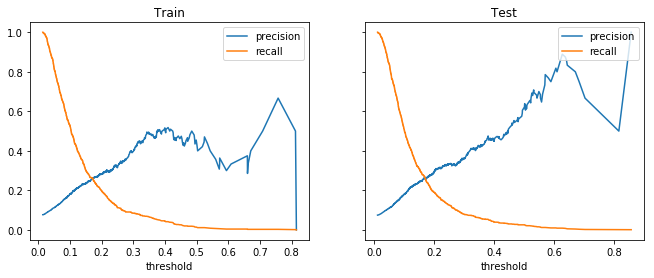

In [104]:
charts_row(chart_models, precision_recal_thresh)

Выведем график ROC-AUC для обучающего и отложенного наборов данных:

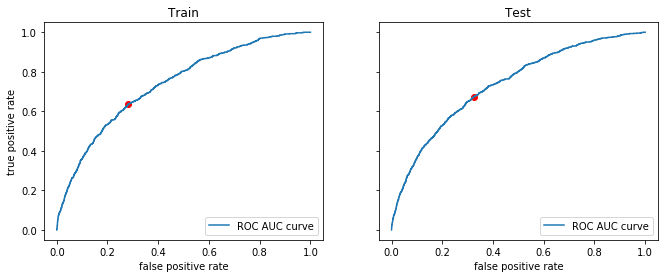

In [106]:
charts_row(chart_models, auc_roc)

Выведем график зависимости точности от полноты для обучающего и отложенного наборов данных: 

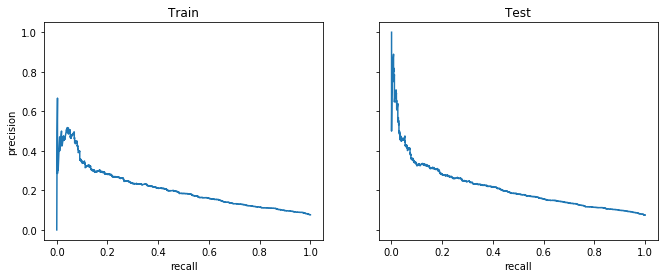

In [107]:
charts_row(chart_models, auc_prc)

Видно, что на отложенной holdout выборке модель показывает практически в точности такой же результат по основной метрике ROC-AUC, как и на обучающей выборке. Это очень хорошо. Это говорит об устойчивости модели. Судя по всему, при настройке модели удалось избежать переоптимизации и переподгонки под данные. Я думаю, это говорит нам о хорошем качестве построенной модели.

В соревновании на kaggle в качестве метрики взята ROC AUC. Моя модель набрала 0.68122 по метрике ROC AUC, успешно преодолев baseline равный 0.66710.
	

# Оценка экономического эффекта

Построим простую экономическую модель для оценки эффекта от внедрения полученного решения на практике. Введём следующие параметры:
-    300 рублей в среднем приносит один пользователь в месяц;
-   100 рублей в среднем мы будем вкладывать в удержание одного пользователя;
-    с вероятностью 0.8 пользователь примет наше предложение;
-    топ 1% согласно ранжированию по нашей модели будет участвовать в кампании;
-    12000 клиентов пользуются услугами компании.



In [116]:
month_revenue_per_user = 300 # Сколько денег в среднем приносит один пользователь в месяц (300 рублей)
price_per_user_churn = 100 # Сколько денег будем вкладывать в удержание пользователя (100 рублей)
retention_probability = 0.8 # Вероятность, с которой пользователь, собирающийся уйти, примет предложение
participants_perc = 0.01 # Сколько пользователей участвует. Участвует топ 1% согласно ранжированию по нашей модели
churn_size = 0.0744 # Процент пользователей, собирающихся уйти
clients_count = 12000 # Количество клиентов

Количество пользователей, которое будет участвовать в кампании будем считать исходя из значения порога, по которому строим предсказания. По сути, мы определим оптимальный размер топа путем перебора различных вариантов.

Для этого придется построить модель и вероятности принадлежности клиентов из тестовой выборки к классу "отток".

Объявим функции, необходимые для построения модели.

In [110]:
model = GradientBoostingClassifier().fit(preprocessed_x_train, preprocessed_y_train)

In [111]:
probabilities = predict_model_proba(preprocessed_x_test, model)

In [112]:
def calculate_revenue(probas, threshold, precision, count, rp):
    clients_count = len(probas)
    churn_count = np.round(clients_count * churn_size, 0) # Количество пользователей, которые собриаются уйти
    churn_found = np.round(churn_count*precision, 0) # Количество пользователей, собирающихся уйти, которых выявила модель
    #participants_count = len([p for p in probas if p > threshold]) # Количество пользователей в кампании
    participants_count = count
    not_participants_cnt = clients_count-participants_count # Количество пользователей не участвующих в кампании
    others_count = participants_count - churn_found # Количество пользователей не собирающихся уходить
    
    #retention_size = np.round(churn_found * retention_probability, 0) # Количество пользователей, которых удалось сохранить
    retention_size = rp
    churned = churn_count-retention_size # Количество пользователей, которые ушли
    saved_count = clients_count - churned # Количество пользователей после проведения кампании
    
       
    month_revenue = retention_size*month_revenue_per_user * retention_probability# Сколько денег получили в месяц
    money_spent = participants_count * price_per_user_churn # Сколько денег потратили на удержание в месяц
    
    
    return threshold, np.round(participants_count*100.0/clients_count, 2), month_revenue-money_spent, retention_size, participants_count

def build_revenue_table(shift = 0):
    data = []
    for threshold in np.arange(0.0, 1.0, 0.01):
        predictions = [-1 if probability < threshold else 1 for probability in probabilities]
        precision = precision_score(list(preprocessed_y_test), predictions) + shift
        r_pred = pd.DataFrame({'pred':predictions, 'test':list(preprocessed_y_test)})
        r_pred.head()
        rp = 0 # клиенты которые хотели но передумали
        count=0 #счетчик для клиентов которые могут уйти
        for index, row in r_pred.iterrows():
            if row['pred'] == 1 and row['test'] == 1:
                rp = rp + 1
            if row['pred'] == 1:
                count=count+1
    
        revenue_info = calculate_revenue(probabilities, threshold, precision, count, rp)
        data.append(revenue_info)
    return data

In [115]:
revenue_table = build_revenue_table()

Выведем таблицу, которая показывает, как от порогового значения вероятности зависит количество клиентов класса "отток" для которых эта вероятность выше. Таким образом становится понятно, какой топ клиентов необходимо брать для наибольшего экономического эффекта, который также рассчитан в таблице и по нему данная таблица отсортированна. Также приведено число клиентом(Count), которое были идентифицированны как склонные к оттоку, а также число клиентов (Saved clients count), которые действительно бы ушли, если бы не стали участниками акции по удержанию.

In [117]:
pd.DataFrame(
    sorted(revenue_table, key=lambda r: -r[2]),
    columns=["Threshold", "Clients %", "Effect", "Saved clients count", "Count"]).head(5)

,Threshold,Clients %,Effect,Saved clients count,Count
0,0.50,0.33,1280.0,22,40
1,0.53,0.22,1140.0,16,27
2,0.51,0.27,1120.0,18,32
3,0.38,0.81,1100.0,45,97
4,0.46,0.41,1100.0,25,49


Для моей модели оптимальным оказалось взять 0.33% клиентов склонных к оттоку (по мнению модели) для получения максимальной прибыли. Это соответствует значению порога 0.5. То есть когда модель считает, что пользователь может уйти с вероятностью 50%, с ним можно начинать проводить кампанию по удержанию. Таких пользователей из 12000 оказалось 40 , и 22 из них готовы скоро уйти. Таким образом точность предсказания для этой группы пользователей  составляет  примерно 50%. Эффект от проведения компании составит 1280 рублей. 

В исходной задаче нам не было дано никаких экономических параметров для оценки экономической эффективности. Мои параметры выбраны исключительно для примера, чтобы показать работоспособность модели и продемонстрировать метод самой простой экономической оценки. Все зависит от отношения между средней прибылью от одного клиента и стоимостью попытки его удержания, а также от того насколько эффективна в среднем такая попытка удержания. Самое главное, что была проведена оптимизация параметров проведения кампании для максимизации прибыли с использованием построенной простой экономической модели.

# Об идеях и дополнениях по внедрению модели

Дополнительно можно сформулировать и предложить дизайн онлайн эксперимента, на основании которого можно будет оценить качество работы модели в продакшн. Может быть стоит провести А/Б-тестирование? Каким в этом случае будет дизайн эксперимента? Может быть вы захотите сформулировать предложения по процессу эксплуатации модели, мониторинга за качеством и дообучения модели? Проявите фантазию=)

Как писалось выше, использование прогнозной модели может оказаться экономически выгодным. Однако, на практике все оказывается по-другому, чем представлялось заранее. Поэтому хотелось бы поделиться некоторыми общими соображениями по поводу внедрения и использования модели:
- Средний доход от одного абонента - это очень грубое усреднение. Необходимо разделять клиентов как минимум на важных(высокодоходных), обычных и низкодоходных. Именно для важных клиентов кампании по удержанию будут наиболее эффективны, потому что для них соотношение между месячной прибылью и стоимостью удержания будет максимальной. Для низкодоходных клиентов возможно вообще стоит отказаться от попыток по их удержанию.

- "Средний" абонент. При построении прогнозной модели все пользователи усреднялись. Без сомнений, это весьма грубое допущение, потому как потребности у абонентов разные. Например, у кого-то может быть в приоритете стоимость сообщений, у кого-то интернет для планшета на дополнительном номере, а для кого-то важна бесперебойная связь в роуминге. Поэтому каждому надо делать предложение, которое может заинтересовать именно его, а не "среднего" абонента. Отсюда вывод о необходимости сегнментации абонентов (к счастью, не только для использования модели, а вообще для понимания поведения абонентов);

- A/A тестирование. При наличии достаточного количества данных можно провести А/А тестирование бесплатно и узнать, например, как сильно могут отличаться доли в двух группах абонентов, которым мы не делаем никакого предложения. Если результаты существенно различаются, то, вероятно, мы плохо разбиваем пользователей на группы или упускаем что-то еще;

- Разбиение пользователей для A/B тестирования. Здесь кажется логичным делать стратифицированные разбиения. Например, отобраны top% абонентов 1, 3, 5, ... абоненты попадут в группу A, а 2, 4, 6, ... абоненты попадут в группу B. Здесь мы полагаем эту выборку стратифицированной основываясь на результатах прогнозной модели (сначала идут те абоненты, предсказанная вероятность для которых больше). Однако, свои изменения могут внести сегментация, свежесть модели и прочее;

- Профиль пользователя. Для каждого абонента можно анализировать историю звонков, ведь кто-то может пользоваться услугами преимущественно в рабочее время или наоборот. Так же, может оказаться полезным вычислять местоположение абонента, что тоже расскажет об абоненте и т.д. Профилирование и сегментация могут взаимно дополнять друг друга (и, вообще говоря, грань между ними может быть условной);

- Наблюдение за ключевыми параметрами. Построить и использовать модель может оказаться полезным и выгодным делом, но, скорее всего, она не будет вечной. Поэтому периодически необходимо проверять как модель работает, как она описывает отток пользователей, постепенно набирая статистику как бизнес-показателей, так и метрик модели. Получая все больше и больше новых данных можно дообучать модель, выявлять ее слабые и сильные стороны;

- Выявление ошибок классификации. Для объектов, где модель ошибается сильно можно найти наиболее близкие (например, использовать косинусную меру) и попытаться выявить, что приводит к ошибке. Однако, может оказаться, что эти объекты аномальные и нет разумных объяснений, почему допускается ошибка. В этом случае, можно разметить дополнительный признак;

- Обновление модели. Рано или поздно настанет момент, когда модель перестанет давать заявленое качество. Это может быть вызвано разными измнениями: ситуация на рынке, новые предложения компании и т.д. Поэтому необязательно дожидаться падения метрик модели, если в работе компании произошли или планируются 

- Очень многое зависит от масштаба бизнеса, от количества клиентов к которым модель может быть применена. Затраты на улучшение модели - это некоторая фиксированная сумма. И для мелкого бизнеса такие вложения могут никогда не окупится, а для крупного бизнеса даже реальное улучшение на 1% может означать прибыль в миллионы рублей. 

- Прежде чем говорить о дополнительных вложениях в исследование по улучшении модели, надо сначала опробовать ту модель которая у нас уже есть в реальных условия. Будет очень хорошо, если она покажет именно те результаты, которые мы от неё ожидаем. Часто показатели эффективности модели в реальных условиях начинают сильно отличаться от заявленных в худшую сторону из-за переподгонки и переоптимизации. Кроме того, могут возникнуть новые факторы, которые не были учтены в модели, но очень сильно сказываются на её успользовании в реальных условиях. Невозможно улучшать до бесконечности, нужно опробывать ту модель которая есть. Если модель докажет свою эффективность, тогда конечно уже можно будет думать о выделении дополнительного финансирования на её улучшение. 

# Заключение

Были проанализированы данные компании Orange и составлена вероятностная модель прогнозирования оттока клиентов. В итоге наилучшее качество было получено с использованием модели на основе градиентного бустинга. При предварительном отборе признаков были удалены все константные признаки и признаки не содержащие значений. Для более точного отбора призков использовался алгоритм SelectKBest, выбирающий 60 колонок. Вещественные признаки масштабируются с помощью StandardScaler. К категориальным признакам применяется LabelEncoder. Работа модели была проверена на holdout выборке, и эту проверку итоговая модель успешно прошла. Это говорит нам о хорошем качестве построенной модели. Также был проведен расчет экономической эффективности модели, показаны условия, когда она может быть прибыльной, а так же высказаны идеи и предположения об ее внедрении и эксплуатации.